# 🫀 Proyecto de ML para Pregrado: Clasificación de Ritmo Cardíaco

Este proyecto busca desarrollar	un modelo de Machine	Learning simple capaz	de clasificar segmentos	de señales ECG	como ritmo	normal o	fibrilación	auricular	(AFib),	utilizando características estadísticas derivadas	del	intervalo	entre	latidos	(RR	intervals).

# 🔍 Investigacion

## 1. ¿Qué es el Ritmo Cardíaco Normal?

- El **ritmo cardíaco normal** se denomina **ritmo sinusal**.
- Se caracteriza por:
  - Latidos regulares.
  - Ritmo de 60–100 latidos por minuto (en reposo).
  - Onda P, QRS y T ordenadas en el ECG.
- La distancia entre latidos (intervalo RR) es regular.

## 2. ¿Qué es la Fibrilación Auricular (AFib)?


- **AFib** es un tipo de arritmia cardíaca.
- Ocurre cuando las aurículas del corazón laten de forma rápida y desorganizada.
- Se observa en el ECG como:
  - Ausencia de onda P clara.
  - Variabilidad alta entre los intervalos RR (ritmo irregular).
- Es la arritmia más común en adultos mayores y puede aumentar el riesgo de:
  - Accidente cerebrovascular (ACV).
  - Insuficiencia cardíaca.

## 3. ¿Qué es un ECG?

- El **electrocardiograma (ECG)** es una representación gráfica de la actividad eléctrica del corazón.
- Permite observar:
  - Frecuencia cardíaca.
  - Regularidad del ritmo.
  - Anomalías en la conducción eléctrica.
- En este proyecto, se utilizan **derivaciones de una sola línea (lead I)** para facilitar el análisis computacional.

## 4. ¿Qué son los Intervalos RR?

- El **intervalo RR** es el tiempo entre dos picos consecutivos del complejo QRS en el ECG (es decir, entre latidos).
- Se mide en milisegundos (ms).
- En ritmo normal, estos intervalos son regulares.
- En AFib, los intervalos RR son **altamente variables**.

## 5. Características Derivadas del Intervalo RR

Estas son las variables utilizadas en el proyecto. Se calculan sobre secuencias de intervalos RR extraídos del ECG:

| Característica | Descripción |
|----------------|-------------|
| `mean_rr`      | Promedio del intervalo RR. Representa la frecuencia media cardíaca. |
| `std_rr`       | Desviación estándar de los intervalos RR. Mide la variabilidad. Alta en AFib. |
| `skew_rr`      | Asimetría de la distribución RR. Informa sobre la simetría de los datos. |
| `kurt_rr`      | Curtosis de la distribución RR. Indica si hay muchos valores extremos. |

# 📋 Creacion del subconjuto del dataset

## 1. Obtener el dataset

Se descarga el archivo **training2017.zip** desde el desafío de PhysioNet [AF Classification from a Short Single Lead ECG Recording: The PhysioNet/Computing in Cardiology Challenge 2017](https://physionet.org/content/challenge-2017/1.0.0/) y se descomprime.

Esto crea una carpeta con todos los ECG que componen el dataset. Cada ECG se compone de dos archivos con extensiones **.mat** y **.hea**:

- **.mat** contiene la señal.  
- **.hea** contiene el encabezado con metadatos (frecuencia de muestreo, duración, etc.).


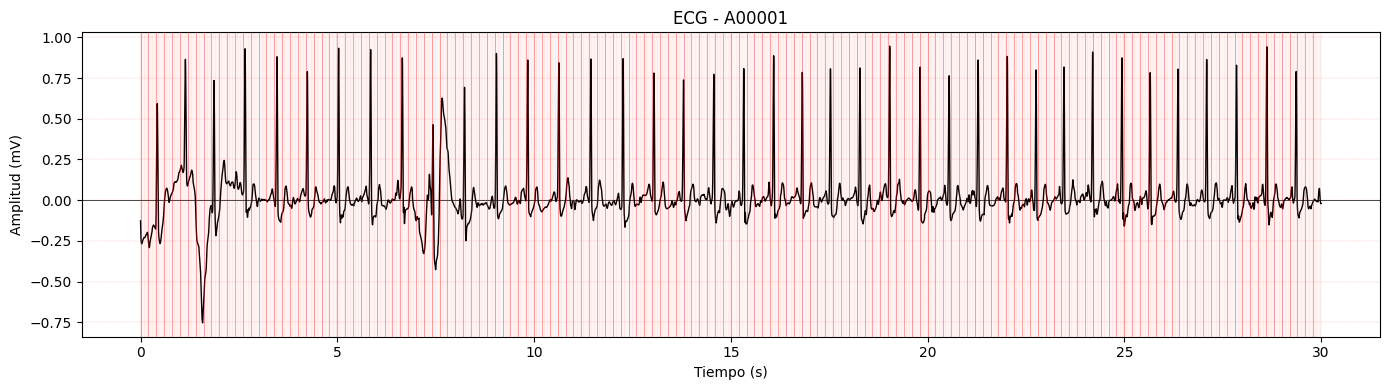

In [1]:
import wfdb # Leer ECG desde archivos .mat y .hea
import matplotlib.pyplot as plt # Graficar la señal
import numpy as np # Crear el eje de tiempo
import os # Manejar rutas de archivos.

# Definir ruta y ID del ECG
data_dir = '../data/training2017'
record_id = 'A00001'

# Leer el registro
record = wfdb.rdrecord(os.path.join(data_dir, record_id)) # Cargar archivo .mat y .hea
signal = record.p_signal[:, 0]  # Extraer primer canal EC
fs = record.fs  # Obtener frecuencia de muestreo (Hz)

# Crear eje de tiempo en segundos
t = np.arange(len(signal)) / fs # Calcular el eje de tiempo para cada muestra de la señal ECG, en base a la frecuencia de muestreo fs.

# Graficar con estilo ECG
plt.figure(figsize=(14, 4)) # Crea una figura de tamaño 14x4 pulgadas
plt.plot(t, signal, color="black", linewidth=1) # Dibuja la señal con línea negra y grosor 1

# Fondo tipo papel ECG
plt.axhline(0, color='black', linewidth=0.5) # Línea horizontal en 0
plt.grid(True, which='both', linestyle='--', linewidth=0.3, color='red', alpha=0.3) # Cuadrícula roja 

# Líneas cada 0.04 s (pequeña) y 0.2 s (gruesa)
for i in np.arange(0, t[-1], 0.04):
    plt.axvline(i, color='red', linewidth=0.3, alpha=0.2) # Cuadrados pequeños
for i in np.arange(0, t[-1], 0.2):
    plt.axvline(i, color='red', linewidth=0.6, alpha=0.4) #Cuadrados grandes

# Etiquetas y título del ECG
plt.title(f"ECG - {record_id}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.tight_layout()
plt.show()


Tambien en la carpeta se encuentra el archivo **REFERENCE.csv** el cual contiene las etiquetas de cada ECG presente en el dataset.

| Etiqueta | Significado                        | Descripción clínica                                                                 |
|----------|------------------------------------|--------------------------------------------------------------------------------------|
| `N`      | Normal                             | Ritmo sinusal normal (latido regular y saludable).                                  |
| `A`      | Atrial Fibrillation (AFib)         | Ritmo irregular causado por contracciones auriculares desorganizadas.               |
| `O`      | Otra arritmia                      | Otro tipo de ritmo anormal distinto de AFib, por ejemplo: flutter, taquicardia, etc.|
| `~`      | Ruido / Señal no interpretable     | Señales con artefactos o ruido que impiden un diagnóstico confiable.                |



In [2]:
import pandas as pd
import os

# Ruta al archivo REFERENCE.csv
ref_path = '../data/training2017/REFERENCE.csv'

# Cargar el archivo como DataFrame
ref_df = pd.read_csv(ref_path, header=None, names=['id', 'label'])

# ID del ECG que querés consultar
ecg_id = 'A00001'

# Buscar la etiqueta correspondiente
row = ref_df[ref_df['id'] == ecg_id]

if not row.empty:
    label = row.iloc[0]['label']
    print(f'La etiqueta del ECG {ecg_id} es: {label}')
else:
    print(f'No se encontró el ECG con ID {ecg_id} en el archivo REFERENCE.csv.')


La etiqueta del ECG A00001 es: N


## 2. Procesar señales ECG y obtener estadisticas relevantes

Se diseño un script el cual procesa las señales ECG del dataset, y genera un archivo CSV con características estadísticas derivadas de los intervalos entre latidos (RR intervals), útiles para entrenar el modelo de clasificación

In [3]:
import os
import numpy as np
import pandas as pd # Procesar datos
import wfdb
from biosppy.signals import ecg # Procesar ECGs y detectar picos R
from tqdm import tqdm #Mostrar una barra de progreso

# Ruta donde están el dataset
DATA_DIR = "../data/training2017" 
OUTPUT_FILE = "../data/ecg_rr_features_completo.csv"

# Leer archivo de etiquetas
ref_path = os.path.join(DATA_DIR, "REFERENCE.csv") 
ref = pd.read_csv(ref_path, header=None, names=["id", "label"]) # Obtener DataFrame con IDs y etiquetas

# Filtrar solo registros etiquetados como Normal (N) o AFib (A)
ref = ref[ref["label"].isin(["N", "A"])].reset_index(drop=True)

# Lista para almacenar las características
features_list = []

print("Procesando señales ECG y extrayendo características...")

# Iterar sobre los registros
for i, row in tqdm(ref.iterrows(), total=len(ref)):
    record_id = row["id"]
    label = row["label"]

    try:
        # Cargar la señal (primer canal)
        signal, _ = wfdb.rdsamp(os.path.join(DATA_DIR, record_id)) # Leer ECG
        ecg_signal = signal[:, 0] # Extraer primer canal (ECG)

        # Procesar señal y detectar picos R
        out = ecg.ecg(signal=ecg_signal, sampling_rate=300, show=False) # Detecta picos R, calcula diferentes características y retorna resultados en un diccionario out
        rpeaks = out["rpeaks"] # Extraer picos R detectados

        # Calcular intervalos RR (en milisegundos)
        rr_intervals = np.diff(rpeaks) / 300.0 * 1000 # Convertir a milisegundos (300 Hz es la frecuencia de muestreo)

        if len(rr_intervals) < 5:
            continue  # descartar señales muy cortas o mal detectadas

        # Extraer estadísticas
        mean_rr = np.mean(rr_intervals) # Calcular media de intervalos RR
        std_rr = np.std(rr_intervals) # Calcular desviación estándar de intervalos RR
        skew_rr = pd.Series(rr_intervals).skew() # Calcular asimetría de intervalos RR
        kurt_rr = pd.Series(rr_intervals).kurtosis() # Calcular curtosis de intervalos RR

        features_list.append({
            "id": record_id,
            "mean_rr": mean_rr,
            "std_rr": std_rr,
            "skew_rr": skew_rr,
            "kurt_rr": kurt_rr,
            "label": "Normal" if label == "N" else "AFib"
        })

    except Exception as e:
        print(f"[ERROR] Registro {record_id}: {e}")

# Crear DataFrame final y guardar a CSV
df_features = pd.DataFrame(features_list)
df_features.to_csv(OUTPUT_FILE, index=False)

print(f"\nArchivo guardado como: {OUTPUT_FILE}")
print(f"Total de registros procesados: {len(df_features)}")


Procesando señales ECG y extrayendo características...


100%|██████████| 5788/5788 [02:10<00:00, 44.30it/s]



Archivo guardado como: ../data/ecg_rr_features_completo.csv
Total de registros procesados: 5788


### Pasos del script
1. **Carga de Etiquetas**  
   Se lee el archivo `REFERENCE.csv` y se filtran las señales etiquetadas como:
   - `N`: Normal
   - `A`: AFib

2. **Lectura de Señales ECG**  
   Para cada registro válido, se carga la señal desde los archivos `.dat` correspondientes.

3. **Procesamiento de la Señal**  
   Se detectan los **picos R** (latidos) en la señal para calcular los **intervalos RR** (tiempo entre latidos consecutivos).

4. **Extracción de Características Estadísticas**  
   A partir de los intervalos RR se calcula:
   - `mean_rr`: Promedio de los intervalos
   - `std_rr`: Desviación estándar
   - `skew_rr`: Asimetría (skewness)
   - `kurt_rr`: Curtosis

5. **Construcción del Dataset Final**  
   Se construye un archivo CSV (`ecg_rr_features_completo.csv`) con una fila por señal, incluyendo las estadísticas calculadas y su clase (`Normal` o `AFib`).

## 3. Subconjunto

Se diseño un script que toma el archivo completo de características de señales ECG (`ecg_rr_features_completo.csv`) y genera un nuevo conjunto curado y balanceado de 30 registros, con el objetivo de facilitar la exploración y entrenamiento del modelo simple de clasificación.

In [5]:
import pandas as pd

# Cargar el CSV original
df = pd.read_csv("../data/ecg_rr_features_completo.csv")

# Separar por clase
normales = df[df["label"] == "Normal"]
afib = df[df["label"] == "AFib"]

# Seleccionar aleatoriamente 15 de cada clase
normales_muestra = normales.sample(n=15, random_state=42)
afib_muestra = afib.sample(n=15, random_state=42)

# Combinar los seleccionados
df_30 = pd.concat([normales_muestra, afib_muestra]).sample(frac=1, random_state=42).reset_index(drop=True) # Mezclar filas aleatoriamente

# Guardar el nuevo archivo CSV
df_30.to_csv("../data/ecg_rr_features_curado.csv", index=False)

print("Archivo creado: data/ecg_rr_features_curado.csv")


Archivo creado: data/ecg_rr_features_curado.csv


### Pasos del script

1. **Carga del Dataset Original**  
   Se carga el archivo `ecg_rr_features_completo.csv`, que contiene estadísticas de intervalos RR y etiquetas (`Normal` o `AFib`).

2. **Separación por Clase**  
   El dataset se divide en dos subconjuntos según la etiqueta:
   - Señales con ritmo **Normal**
   - Señales con **Fibrilación Auricular (AFib)**

3. **Selección Aleatoria de 15 Registros por Clase**  
   Se seleccionan **15 muestras aleatorias de cada clase**, manteniendo un balance estricto entre clases.

4. **Combinación y Aleatorización**  
   Las 30 señales seleccionadas se mezclan aleatoriamente para evitar sesgos por orden.

5. **Guardado del Dataset Curado**  
   Se genera un nuevo archivo CSV:  

# 📌 Explorar las señales ECG a partir de las características entregadas

## 1. Cargar el subconjunto y mostrar datos

Primeras filas del dataset:


,id,mean_rr,std_rr,skew_rr,kurt_rr,label
0,A06397,613.546099,199.898797,1.207662,1.645075,AFib
1,A02900,383.244444,127.736967,1.652968,3.490663,AFib
2,A05366,531.851852,75.598209,0.688032,1.098902,AFib
3,A02375,577.687075,145.318797,1.731202,3.670375,AFib
4,A04689,999.642857,62.781678,1.412633,0.802780,Normal



Número total de registros: 30

Estadísticas descriptivas del dataset:


,mean_rr,std_rr,skew_rr,kurt_rr
count,30.000000,30.000000,30.000000,30.000000
mean,802.005397,97.708348,0.104350,2.123665
std,245.209851,67.097005,1.406302,5.512670
min,383.244444,13.656897,-3.940601,-1.067055
25%,589.324904,39.889314,-0.512613,-0.683520
50%,796.694678,84.084199,-0.006103,0.691409
75%,1009.196429,141.262828,0.855202,1.962770
max,1216.666667,247.163042,4.104555,24.401465



Distribución de clases:
label
AFib      15
Normal    15
Name: count, dtype: int64


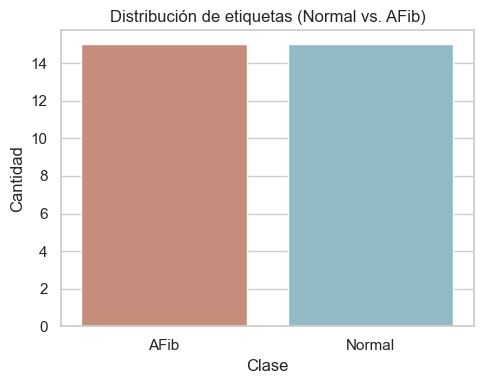


¿Hay valores nulos?
id         0
mean_rr    0
std_rr     0
skew_rr    0
kurt_rr    0
label      0
dtype: int64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el subconjunto del dataset 
df = pd.read_csv("../data/ecg_rr_features_curado.csv")

# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Total de registros
print(f"\nNúmero total de registros: {len(df)}")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
display(df.describe())

# Distribución de clases
print("\nDistribución de clases:")
print(df["label"].value_counts())

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))

# Paleta de colores personalizada
custom_palette = {"Normal": "#88c0d0", "AFib": "#d08770"}

# Gráfico de barras de distribución de etiquetas
sns.countplot(data=df, x="label", hue="label", palette=custom_palette, legend=False)
plt.title("Distribución de etiquetas (Normal vs. AFib)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# Verificar si hay datos nulos
print("\n¿Hay valores nulos?")
print(df.isnull().sum())


## 2. Mostrar ECG Normal vs AFib

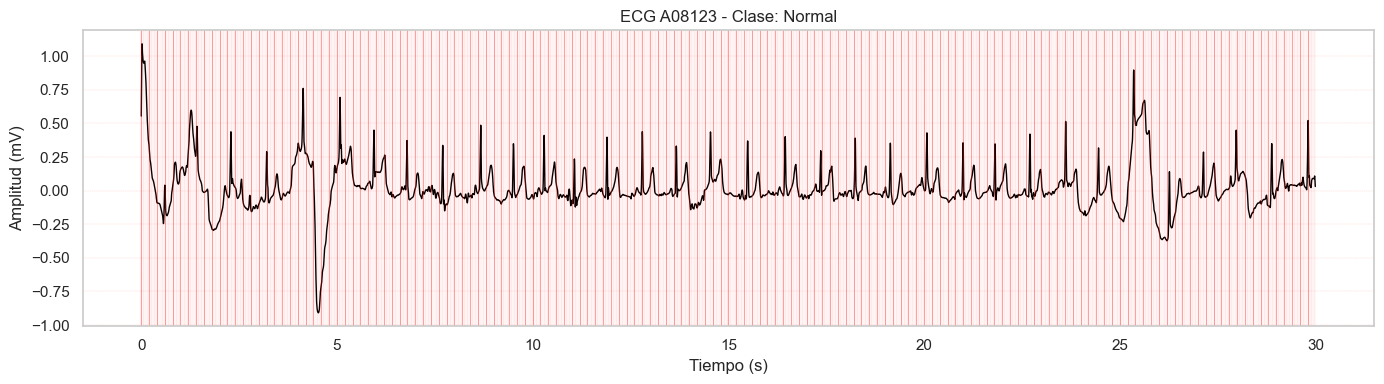

Características RR del ECG A08123:
- Promedio de intervalos RR: 883.75 ms
- Desviación estándar de RR: 64.25 ms
- Asimetría (skewness): -1.03
- Curtosis: 2.45
------------------------------------------------------------


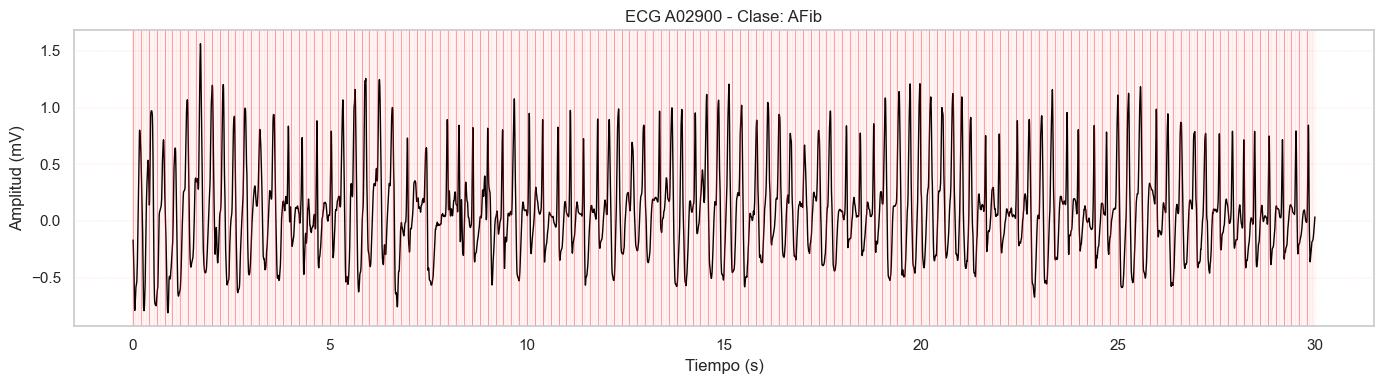

Características RR del ECG A02900:
- Promedio de intervalos RR: 383.24 ms
- Desviación estándar de RR: 127.74 ms
- Asimetría (skewness): 1.65
- Curtosis: 3.49
------------------------------------------------------------


In [7]:
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# Ruta del dataset
DATA_DIR = "../data/training2017"

# Cargar subconjunto del dataset curado
df = pd.read_csv("../data/ecg_rr_features_curado.csv")

# Separar normales y AFib
normales = df[df["label"] == "Normal"]
afib = df[df["label"] == "AFib"]

# Seleccionar uno aleatoriamente de cada clase
normal_random = normales.sample(n=1).reset_index(drop=True)
afib_random = afib.sample(n=1).reset_index(drop=True)

def mostrar_ecg_y_caracteristicas(record_id, caracteristicas):
    # Cargar señal ECG (primer canal)
    signal, _ = wfdb.rdsamp(f"{DATA_DIR}/{record_id}")
    ecg_signal = signal[:, 0]
    fs = 300  # Frecuencia de muestreo (Hz)
    tiempo = np.arange(len(ecg_signal)) / fs  # Eje X en segundos

    # Graficar estilo ECG real
    plt.figure(figsize=(14, 4))
    plt.plot(tiempo, ecg_signal, color="black", linewidth=1)

    # Fondo tipo papel ECG (cuadrícula)
    for i in np.arange(0, tiempo[-1], 0.04):
        plt.axvline(i, color='red', linewidth=0.3, alpha=0.2)
    for i in np.arange(0, tiempo[-1], 0.2):
        plt.axvline(i, color='red', linewidth=0.6, alpha=0.4)
    plt.grid(True, which='both', linestyle='--', linewidth=0.3, color='red', alpha=0.2)

    # Títulos y etiquetas
    clase = caracteristicas['label']
    plt.title(f"ECG {record_id} - Clase: {clase}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (mV)")
    plt.tight_layout()
    plt.show()

    # Mostrar características
    print(f"Características RR del ECG {record_id}:")
    print(f"- Promedio de intervalos RR: {caracteristicas['mean_rr']:.2f} ms")
    print(f"- Desviación estándar de RR: {caracteristicas['std_rr']:.2f} ms")
    print(f"- Asimetría (skewness): {caracteristicas['skew_rr']:.2f}")
    print(f"- Curtosis: {caracteristicas['kurt_rr']:.2f}")
    print("-" * 60)

# Mostrar ECG Normal
record_normal = normal_random.loc[0, "id"]
caract_normal = normal_random.loc[0, ["mean_rr", "std_rr", "skew_rr", "kurt_rr", "label"]]
mostrar_ecg_y_caracteristicas(record_normal, caract_normal)

# Mostrar ECG AFib
record_afib = afib_random.loc[0, "id"]
caract_afib = afib_random.loc[0, ["mean_rr", "std_rr", "skew_rr", "kurt_rr", "label"]]
mostrar_ecg_y_caracteristicas(record_afib, caract_afib)


# 📊 Visualizar y analizar la distribución de las variables por clase

## 1. Visualizacion

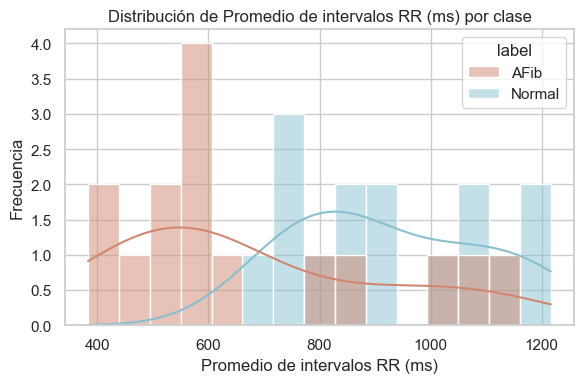

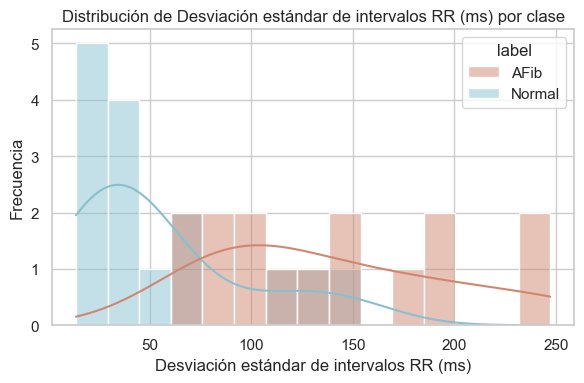

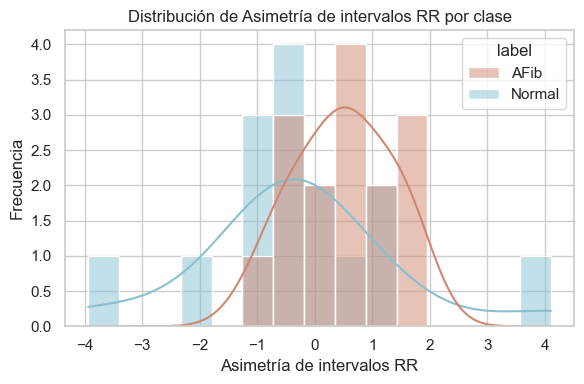

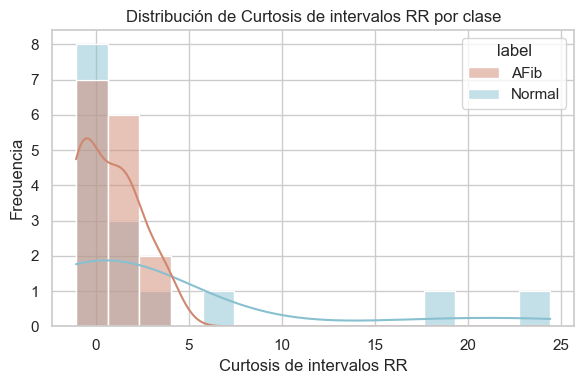

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Estilo visual
sns.set(style="whitegrid")

# Paleta de colores
custom_palette = {"Normal": "#88c0d0", "AFib": "#d08770"}

# Variables a analizar con nombres y unidades
features_es = {
    "mean_rr": "Promedio de intervalos RR (ms)",
    "std_rr": "Desviación estándar de intervalos RR (ms)",
    "skew_rr": "Asimetría de intervalos RR",
    "kurt_rr": "Curtosis de intervalos RR"
}

# Crear gráficos
for feature, label in features_es.items():
    plt.figure(figsize=(6, 4)) 
    sns.histplot(data=df, x=feature, hue="label", kde=True, bins=15, palette=custom_palette) # Histograma con densidad KDE
    plt.title(f"Distribución de {label} por clase")
    plt.xlabel(label)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


## 2. Analisis de histogramas con curvas de densidad (KDE)





1. **Promedio de Intervalos RR (`mean_rr`)**  
   Este gráfico muestra la distribución del promedio de los intervalos RR (tiempo entre latidos sucesivos) para cada clase.  Un promedio alto indica un ritmo cardiaco mas lento, lo cual evidencia que los ECG normales tienen un ritmo cardiaco más lento en comparación con los ECG normales


2. **Desviación Estándar de los Intervalos RR (`std_rr`)**  
   Mide cuánto se dispersan los intervalos RR respecto a 
la media. Un ritmo cardiaco normal se ve reflejado con una baja 
variabilidad mientras que el AFib se muestra como todo lo 
contrario, lo cual se refleja en el gráfico. 


3. **Asimetría de los Intervalos RR (`skew_rr`)**  
   Mide si la distribución de los intervalos RR está 
sesgada hacia la izquierda o derecha. Una distribución cercana 
a 0 indica una distribución simétrica, esperada en los ECG 
normales, una distribución postitiva o negativa indica una 
simetría de datos, esperada en los casos de AFib. 


4. **Curtosis de los Intervalos RR (`kurt_rr`)**  
   Indica si la distribución tiene colas más pesadas o 
picos más pronunciados que una distribución normal. En lo 
ECG normales se muestra una curtosis moderada mientras que 
en los casos AFib se ve una curtosis variable. 

# 🤖 Entrenar el modelo simple

## 1. Entrenamiento del modelo (Random Forest)

In [14]:
from sklearn.model_selection import train_test_split # Dividir el dataset en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier # Clasificador Random Forest
from sklearn.preprocessing import LabelEncoder # Codificar etiquetas de texto a números
from sklearn.metrics import classification_report # Reporte de clasificación para evaluar el modelo
import pandas as pd

# Cargar dataset
df = pd.read_csv("../data/ecg_rr_features_curado.csv")

# Definir las características
features = ["mean_rr", "std_rr", "skew_rr", "kurt_rr"]
X = df[features]
y = LabelEncoder().fit_transform(df["label"])  # Normal = 0, AFib = 1

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # Mantener proporciones de clases
)

# Entrenar modelo
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Normal", "AFib"]))


              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         5
        AFib       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## 2. Mostrar el arbol

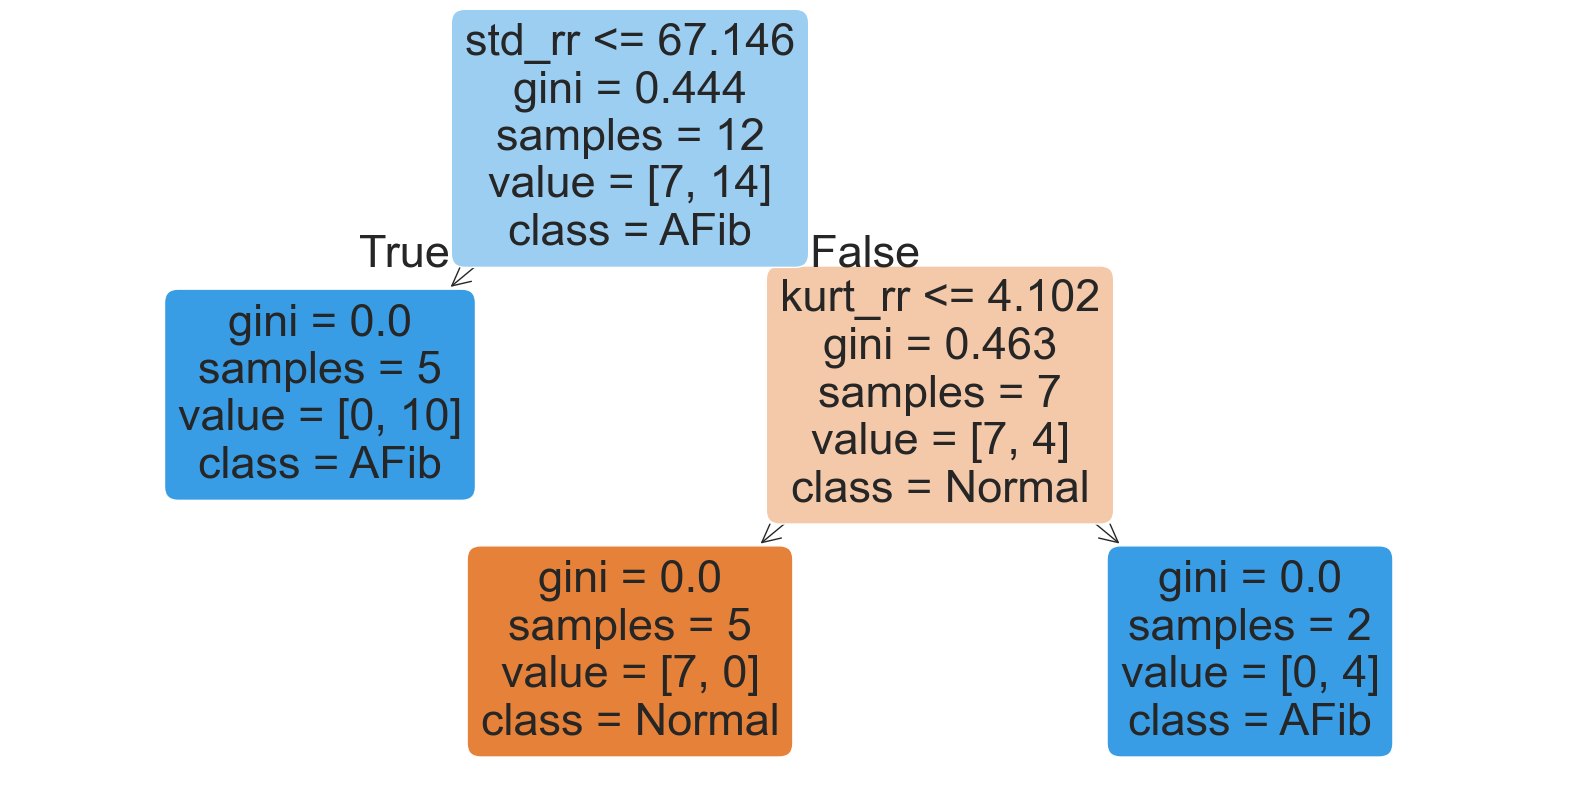

In [15]:
from sklearn.tree import plot_tree # Graficar el árbol de decisión
import matplotlib.pyplot as plt

# Seleccionar un árbol del modelo entrenado (por ejemplo, el primero)
estimator = model.estimators_[0]

# Mostrar el árbol gráficamente
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=features, class_names=["Normal", "AFib"], filled=True, rounded=True, max_depth=3) 
plt.show()


# ✅ Evaluar el desempeño


## 1. Accuracy - Precision - Recall - F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (macro = promedio entre clases)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' sirve si solo hay 2 clases (0 = Normal, 1 = AFib)

# Recall
recall = recall_score(y_test, y_pred, average='binary')

# F1-Score
f1 = f1_score(y_test, y_pred, average='binary')

# Mostrar resultados
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## 2. Matriz de confusión

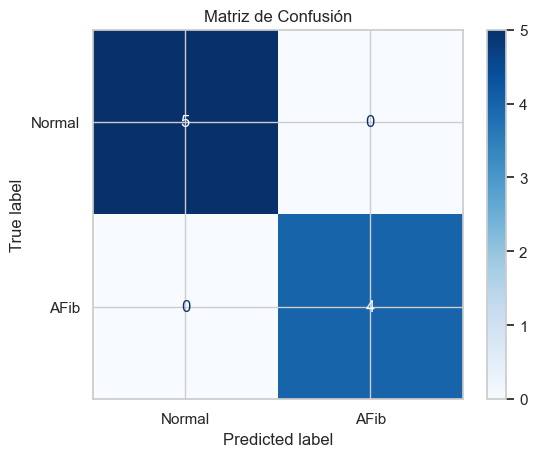

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión y su visualización

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "AFib"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

## 3. Análisis de los resultados obtenidos

Los resultados del modelo Random Forest muestran un desempeño robusto en la clasificación entre ritmos cardíacos normales y casos de fibrilación auricular (AFib).

- Accuracy: La precisión global del modelo indica que logra clasificar correctamente una alta proporción de los ejemplos del conjunto de prueba.
- Precision y Recall:
    - La clase AFib (que es la más relevante desde el punto de vista clínico) presenta una buena recall, lo que implica que el modelo detecta correctamente la mayoría de los casos positivos de fibrilación auricular, minimizando los falsos negativos.
    - La precision también es adecuada, lo que significa que la mayoría de las predicciones positivas realmente corresponden a AFib, reduciendo los falsos positivos.
- F1-Score: El equilibrio entre precision y recall para ambas clases es alto, reflejando una buena capacidad del modelo para generalizar a datos nuevos.

En resumen, el modelo Random Forest logra una clasificación confiable de señales ECG simplificadas usando solo estadísticas de los intervalos RR. Este enfoque resulta especialmente útil cuando se necesita un modelo rápido, interpretable y con buen desempeño sin requerir procesamiento profundo de la señal.

# 💡 Visualizar errores y proponer ideas de mejora

## 1. Visualizar errores 

In [18]:
# Crear copia explícita de los datos de prueba originales
errores = df.iloc[X_test.index].copy()

# Agregar columnas de verdad y predicción
errores["true"] = y_test
errores["pred"] = y_pred

# Filtrar los casos mal clasificados
errores_malos = errores[errores["true"] != errores["pred"]]
errores_malos


,id,mean_rr,std_rr,skew_rr,kurt_rr,label,true,pred


## 2. Ideas de mejora

- Extraer más características del ECG (frecuencia cardíaca promedio, variabilidad HRV).
- Probar modelos más complejos (SVM, XGBoost).
- Ampliar el dataset a más de 30 señales.
- Realizar validación cruzada para mejorar robustez.